In [4]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data_jobs.csv")

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [46]:
df_DE_DK=df[(df['job_country']=='Denmark') & (df['job_title_short'] == 'Data Engineer')].copy()

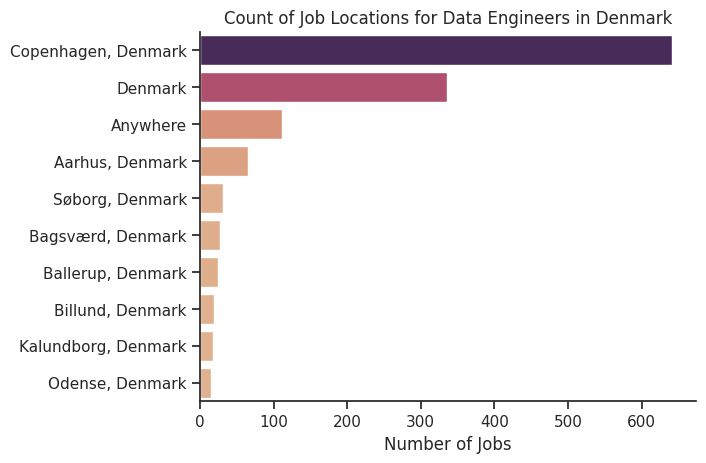

In [55]:
df_plot = df_DE_DK["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='flare',legend=False)
sns.despine()
plt.title('Count of Job Locations for Data Engineers in Denmark')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

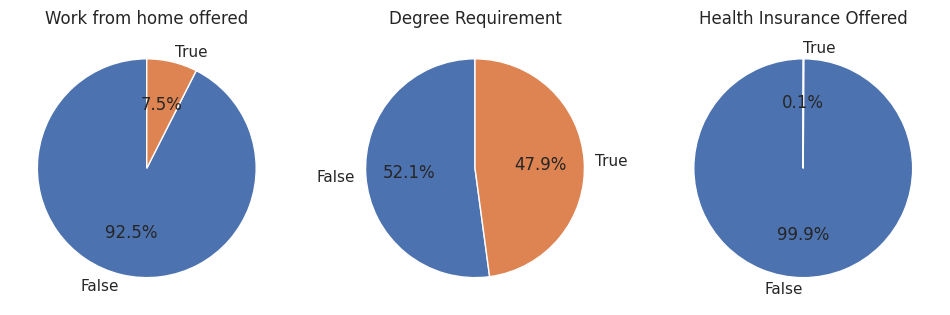

In [53]:
dict_col={
    'job_work_from_home':"Work from home offered",
    "job_no_degree_mention":"Degree Requirement",
    'job_health_insurance':"Health Insurance Offered"
}

fig,ax=plt.subplots(1,3)
fig.set_size_inches((12,5))

for i,(column,title) in enumerate(dict_col.items()):
    ax[i].pie(df_DE_DK[column].value_counts(),labels=['False','True'],autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)
    
plt.show()

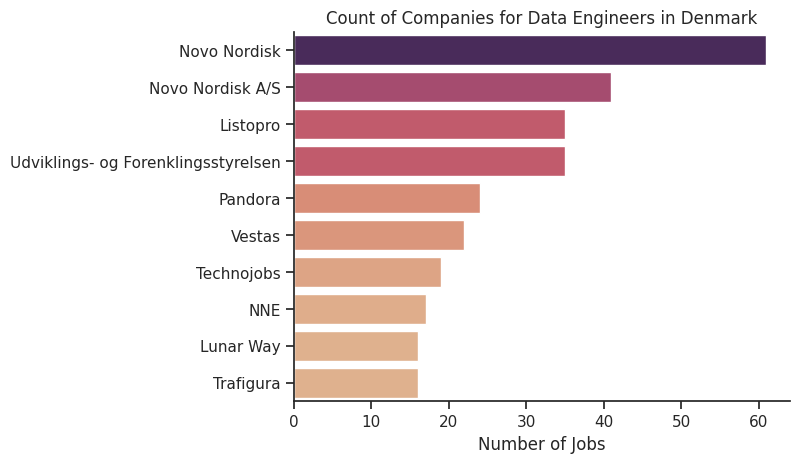

In [56]:
df_plot = df_DE_DK["company_name"].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='flare',legend=False)
sns.despine()
plt.title('Count of Companies for Data Engineers in Denmark')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()